# Assignment 4.1: Create a Juypter Notebook to Connect to SAKILA Database and Visualize Data
In this assignment, you will use your knowledge of relational data to assist a company in creating its initial relational database by completing the following steps:

## Step 1, Create a Jupyter Notebook in VS Code
Question 1: Create a code block to import the necessary python packages:

In [18]:
# import sys
# !{sys.executable} -m pip install pymysql

In [30]:
import numpy as np
import pandas as pd
import pymysql as mysql
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore", category=UserWarning)

## Step 2, Create a code block to connect to the SAKILA database

In [31]:
conn = mysql.connect(
    host="localhost",
    port=int(3306),
    user="root",
    passwd="3655505Myou",
    db="sakila"
)

print("Connected!")

Connected!


## Step 3, Create another code block to query the SAKILA database for all the table names:
tableNames = pd.read_sql("""SHOW TABLES""", conn)
tableNames

In [32]:
tableNames = pd.read_sql("SHOW TABLES;", conn)
tableNames

,Tables_in_sakila
0,actor
1,actor_info
2,address
3,category
4,city
5,country
6,customer
7,customer_list
8,film
9,film_actor


## Step 4
Create another code block to query the SAKILA database for the following information:

#### a. How many films of each rating are present in 'film' table?

In [33]:
# How many films of each rating are present in 'film' table?
q_a = """
SELECT rating, COUNT(*) AS film_count
FROM film
GROUP BY rating
ORDER BY film_count DESC;
"""
df_a = pd.read_sql(q_a, conn)
df_a

,rating,film_count
0,PG-13,223
1,NC-17,210
2,R,195
3,PG,194
4,G,178


#### b. How many films(DISTINCT) of each rating are in stock?

In [34]:
# How many films(DISTINCT) of each rating are in stock?
q_b = """
SELECT f.rating, COUNT(DISTINCT i.film_id) as distinct_film_instock
FROM inventory i
JOIN film f ON i.film_id = f.film_id
GROUP BY f.rating
ORDER BY distinct_film_instock DESC;
"""
df_b = pd.read_sql(q_b, conn)
df_b

,rating,distinct_film_instock
0,PG-13,213
1,NC-17,202
2,R,189
3,PG,183
4,G,171


#### c. How many films are unavailable at the stores?

In [35]:
# How many films are unavailable at the stores?
q_c = """
SELECT s.store_id, Count(*) as unavalable_films
FROM store s 
JOIN film f
left JOIN inventory i 
    ON f.film_id = i.film_id
    AND i.store_id = s.store_id
WHERE i.inventory_id is NULL
GROUP BY s.store_id;
"""
df_c = pd.read_sql(q_c, conn)
df_c


,store_id,unavalable_films
0,1,241
1,2,238


#### d. In which cities are the stores located?

In [36]:
# In which cities are the stores located?
q_d = """
SELECT Distinct c.city
FROM store s
JOIN address a ON s.address_id = a.address_id
JOIN city c ON a.city_id = c.city_id
"""
df_d = pd.read_sql(q_d, conn)
df_d

,city
0,Lethbridge
1,Woodridge


#### e. Which actor, amongst the actors who have worked in all 16 film categories, has performed in the most number of films?

In [37]:
# Which actor, amongst the actors who have worked in all 16 film categories, has performed in the most number of films?
q_e = """
SELECT 
    a.first_name, a.last_name, 
    Count(DISTINCT fc.film_id) as number_film, 
    Count(DISTINCT fc.category_id) as number_category
FROM actor a 
JOIN film_actor fa ON a.actor_id = fa.actor_id
JOIN film_category fc ON fc.film_id = fa.film_id
GROUP BY a.actor_id
ORDER BY number_film DESC
limit 1;
"""
df_e = pd.read_sql(q_e, conn)
df_e

,first_name,last_name,number_film,number_category
0,GINA,DEGENERES,42,16


## Step 5 Visualize one result
Create a code block to visualize the data retrieved from one question above using matplotlib.pyplot. Note question a is recommended as there should only be 2 columns returned the rating and the film_count, and can be easily shown on a bar or pie chart.

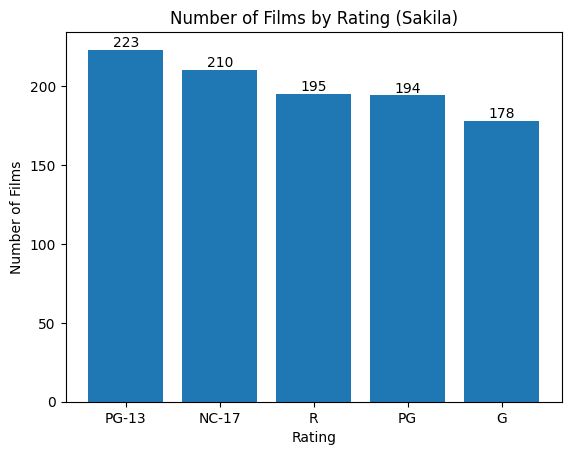

In [38]:
# Bar chart of "how many films of each rating are present in film table"
bars = plt.bar(df_a["rating"], df_a["film_count"])
plt.xlabel("Rating")
plt.ylabel("Number of Films")
plt.title("Number of Films by Rating (Sakila)")
plt.bar_label(bars)
plt.show()

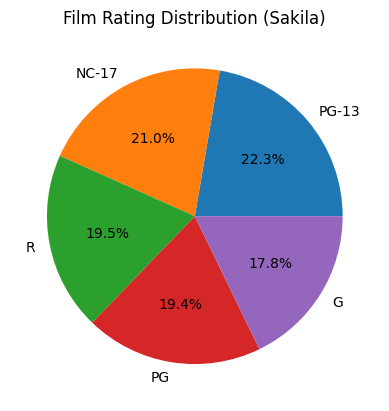

In [39]:
# Pie chart of film rating distribution
plt.pie(df_a["film_count"], labels=df_a["rating"],autopct="%1.1f%%")
plt.title("Film Rating Distribution (Sakila)")
plt.show()

## Step 6 Short description
*Write a short description of your experience using Jupyter notebooks and pyplot.*
Answer:   
This was my first time querying a database using Jupyter Notebooks in VS Code. After setting up the environment, I found that Jupyter made it straightforward to establish a database connection. By using pymysql and running SQL queries step by step, I was able to retrieve data efficiently and view the results immediately as DataFrames. In addition, using matplotlib.pyplot allowed me to visualize the query results directly within the notebook. I liked that I could iterate quickly—if a query looked wrong, I could adjust it and rerun the cell without restarting my workflow.    

*Explain why you chose the chart that you provided for data visualization.*
Answer:   
For visualization, I focused on the number of films by rating. I chose a bar chart because it clearly compares film counts across discrete rating categories and makes differences easy to interpret at a glance. To compare this, I also created a pie chart to examine the relative proportions of each rating category. Using both chart types provided flexibility in exploring the data and present the distribution of film ratings from different perspective.